In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data

items_df = pd.read_csv('/content/items.csv')
restaurants_df = pd.read_csv('/content/resturants.csv')
sales_df = pd.read_csv('/content/sales.csv')

In [ ]:
# Merge Datasets

# Merge sales_df and items_df on 'item_id' and 'id' respectively
merged_df = pd.merge(sales_df, items_df, left_on='item_id', right_on='id', how='left')

# Merge merged_df with restaurants_df on 'store_id' and 'id' respectively
final_df = pd.merge(merged_df, restaurants_df, left_on='store_id', right_on='id', how='left')

# Rename 'name_x' to 'store_name' and 'name_y' to 'item_name'
final_df = final_df.rename(columns={'name_x': 'item_name', 'name_y': 'store_name'})


# Select the desired columns
final_df = final_df[['date', 'item_id','item_name', 'price', 'item_count', 'kcal','store_name',  'store_id', ]]

# Convert the 'date' column to datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

In [ ]:
final_df

,date,item_id,item_name,price,item_count,kcal,store_name,store_id
0,2019-01-01,3,Sweet Fruity Cake,29.22,2.0,931,Bob's Diner,1
1,2019-01-01,4,Amazing Steak Dinner with Rolls,26.42,22.0,763,Bob's Diner,1
2,2019-01-01,12,Fantastic Sweet Cola,4.87,7.0,478,Bob's Diner,1
3,2019-01-01,13,Sweet Frozen Soft Drink,4.18,12.0,490,Bob's Diner,1
4,2019-01-01,16,Frozen Milky Smoothy,3.21,136.0,284,Bob's Diner,1
...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,Blue Ribbon Fish with Bread Lunch,21.93,0.0,708,Corner Cafe,5
109596,2021-12-31,97,Original Fruity Cod with Bread and Vegetables ...,28.65,0.0,744,Fou Cher,4
109597,2021-12-31,98,Original Sweet Milky Soft Drink,5.00,0.0,579,Beachfront Bar,2
109598,2021-12-31,99,Frozen Tomato Soft Drink,5.32,0.0,423,Fou Cher,4


In [ ]:
## EDA

final_df.describe()


,date,item_id,price,item_count,kcal,store_id
count,109600,109600.000000,109600.000000,109600.000000,109600.000000,109600.00000
mean,2020-07-01 12:00:00,50.500000,11.763700,6.339297,536.730000,3.52000
min,2019-01-01 00:00:00,1.000000,1.390000,0.000000,78.000000,1.00000
25%,2019-10-01 18:00:00,25.750000,5.280000,0.000000,406.250000,2.00000
50%,2020-07-01 12:00:00,50.500000,7.625000,0.000000,572.500000,4.00000
75%,2021-04-01 06:00:00,75.250000,18.790000,0.000000,638.250000,5.00000
max,2021-12-31 00:00:00,100.000000,53.980000,570.000000,1023.000000,6.00000
std,NaN,28.866202,8.946225,30.003728,201.200165,1.69989


Observations :

1. item_count

Minimum (0.00): There are some rows where the item_count is zero. This could be a data entry error or an indication of items that were reserved but not purchased.

Maximum (570.00): The maximum value is significantly higher than the 75th percentile (18.79), suggesting the possibility of extreme outliers in the item_count column.

Standard Deviation (30.0037): The standard deviation is quite large relative to the mean (6.3393), which indicates a wide spread in the item_count data.

2. price

Minimum (1.39): This seems reasonable as a minimum price point for an item.

Maximum (53.98): This value seems quite high for a typical food or restaurant item, but it might be valid depending on the data source.

Standard Deviation (8.9462): The standard deviation is quite high, indicating a significant spread of values in the price column, though not necessarily outliers. However, you could investigate prices close to the maximum.

3. kcal (Calories)

Minimum (78.00): This seems reasonable as a minimum calorie value.

Maximum (1023.00): While this is quite high, it's not entirely unreasonable for high-calorie meals.

Zero Values: The 25th, 50th, and 75th percentiles are all 0.00, indicating that a large number of records have zero values for calories. This might suggest missing or incorrect data for these items, as it's unlikely that a meal would have zero calories.


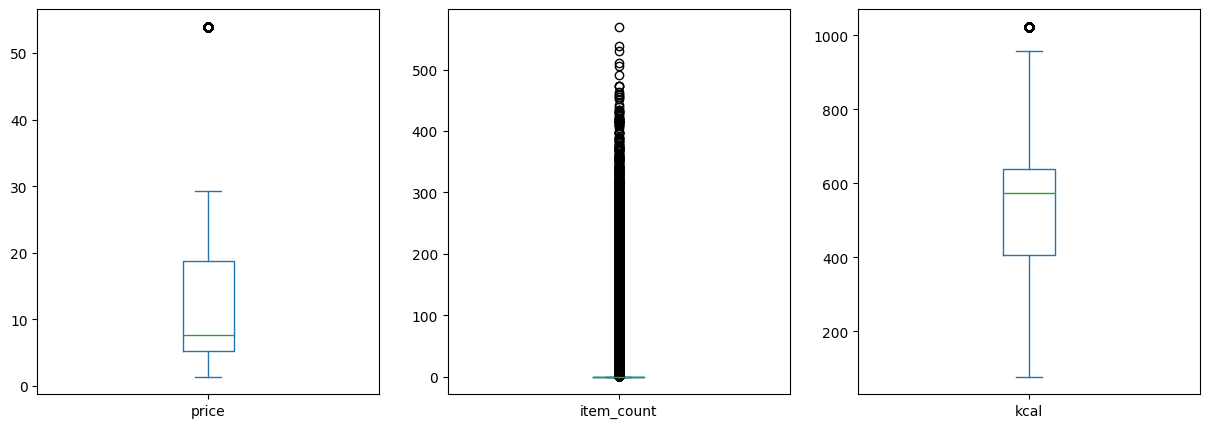

In [ ]:
# Plot boxplots for continuous variables
final_df[['price', 'item_count', 'kcal']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5), showfliers=True)
plt.show()

Observations :

Price:

There is at least one clear outlier above the whiskers (over 50). The majority of prices seem to fall within a reasonable range, but the high-value outlier is notable.

Item Count:

There are numerous outliers above 100 in item count, with values reaching up to 500 or more. This suggests that the distribution of item_count is heavily skewed, with most values clustered near the lower end and a few extreme values.

Calories (Kcal):

There's a single outlier close to 1000 kcal. However, the overall distribution looks relatively normal compared to the price and item count.

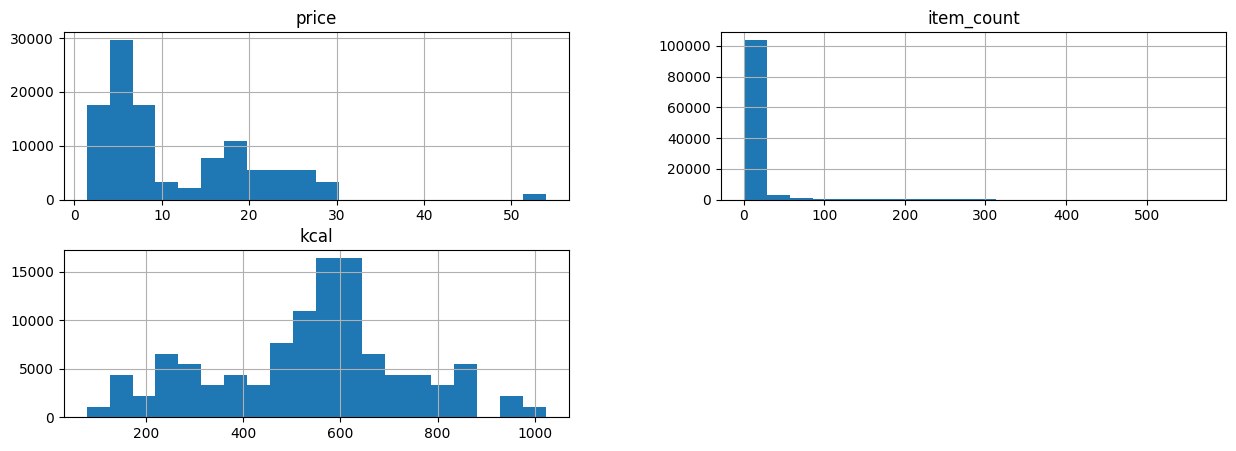

In [ ]:
# Plot histograms for continuous variables
final_df[['price', 'item_count', 'kcal']].hist(bins=20, figsize=(15, 5))
plt.show()


Observations :

Price:

The price distribution is right-skewed, with the majority of items priced between 0 and 20. A smaller number of items have prices between 30 and 50, which could indicate outliers or premium-priced items.

Item Count:

The item count is heavily skewed towards lower values, with a majority clustered at 0 to around 20. However, there are some extreme outliers, with values over 100, possibly indicating unusual or bulk purchases that could require further investigation.

Calories (Kcal):

The distribution of calories is roughly normal, with a peak around 500 to 600 kcal. However, there are items that exceed 1000 kcal, which might be high-calorie items, but they don't seem to be extreme outliers.

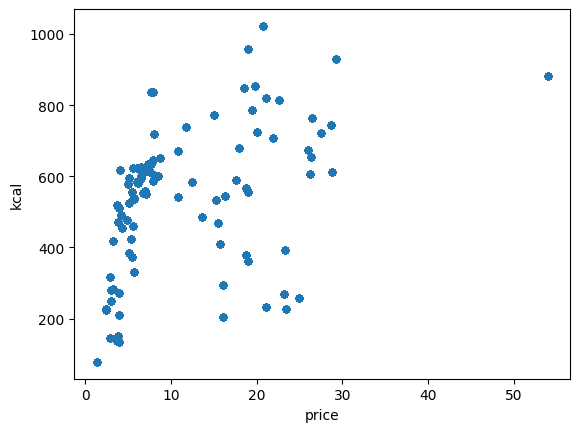

In [ ]:
# Scatter plot for price vs kcal (for example)
final_df.plot(kind='scatter', x='price', y='kcal', alpha=0.5)
plt.show()

Observations :

General Trend:

There seems to be no strong linear relationship between price and kcal. Most of the points are clustered between 0 to 20 in price and between 200 to 800 in kcal. This suggests that more expensive items do not necessarily have more calories.

Outliers:

There is a notable outlier at around 50+ in price, with kcal values close to 1000. This item is likely an extreme in both price and calories, and it stands out from the rest of the data.

In [ ]:
# Investigate the outlier to check its validity

# Filter rows where price is above 50 and kcal is close to 1000
outlier = final_df[(final_df['price'] > 45) & (final_df['kcal'] > 850)]

# Display the outlier data
print(outlier)

             date  item_id                      item_name  price  item_count  \
82     2019-01-01       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   
115    2019-01-02       80  Blue Ribbon Fruity Vegi Lunch  53.98         2.0   
216    2019-01-03       80  Blue Ribbon Fruity Vegi Lunch  53.98         2.0   
316    2019-01-04       80  Blue Ribbon Fruity Vegi Lunch  53.98         1.0   
482    2019-01-05       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   
...           ...      ...                            ...    ...         ...   
109119 2021-12-27       80  Blue Ribbon Fruity Vegi Lunch  53.98         1.0   
109280 2021-12-28       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   
109379 2021-12-29       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   
109480 2021-12-30       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   
109580 2021-12-31       80  Blue Ribbon Fruity Vegi Lunch  53.98         0.0   

        kcal store_name  store_id  
82 

In [ ]:
# Fixing 0 in item_counts

# Calculate the proportion of rows where item_count is 0
zero_item_count_proportion = (final_df['item_count'] == 0).mean() * 100

# Display the result
print(f"Proportion of item_count values that are 0: {zero_item_count_proportion:.2f}%")

Proportion of item_count values that are 0: 78.57%


In [ ]:
# Function to replace zero item_count values with the non-zero median of the specific item
def replace_zeros_with_median(group):
    # Calculate median, ignoring zero values
    median_value = group[group['item_count'] > 0]['item_count'].median()
    # Replace zero values with the calculated median
    group['item_count'] = group['item_count'].replace(0, median_value)
    return group

# First, replace zero values in the item_count with the median (ignoring zeros)
final_df = final_df.groupby('item_name', group_keys=False).apply(replace_zeros_with_median)

# Drop remaining rows where item_count is NaN
final_df = final_df.dropna(subset=['item_count'])

<ipython-input-16-a8c22dbe0ae2>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby('item_name', group_keys=False).apply(replace_zeros_with_median)


In [ ]:
final_df.isna().sum()

,0
date,0
item_id,0
item_name,0
price,0
item_count,0
kcal,0
store_name,0
store_id,0


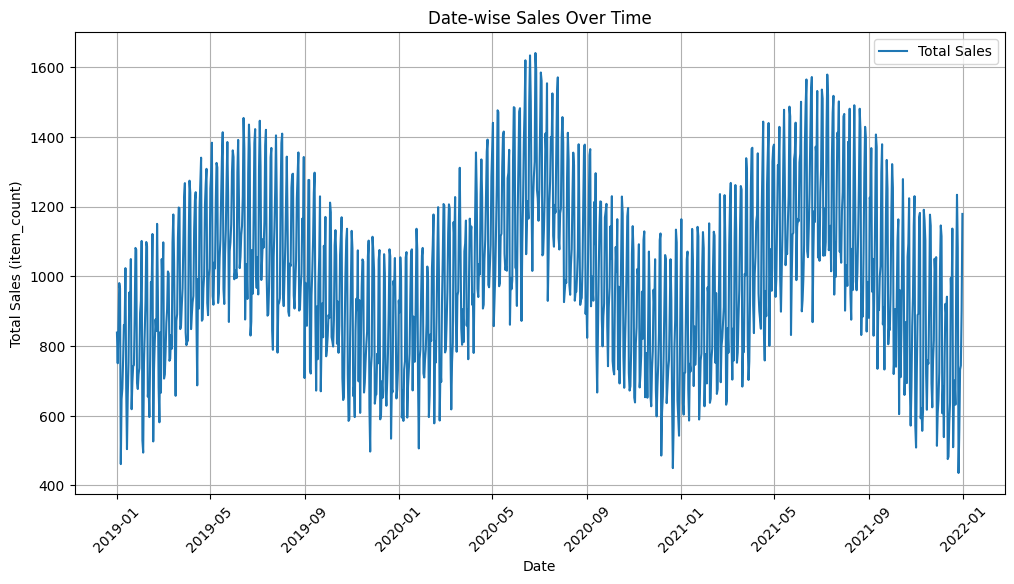

In [ ]:
# Exploring Date-wise Sales

# Aggregate sales (item_count) by date
datewise_sales = final_df.groupby('date')['item_count'].sum()

# Plot the date-wise sales to understand the pattern
plt.figure(figsize=(12, 6))
plt.plot(datewise_sales.index, datewise_sales.values, label='Total Sales')
plt.title('Date-wise Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (item_count)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Observations :

Cyclical Pattern: There seems to be a repeating cyclical pattern in the sales data, with peaks and troughs occurring regularly. This suggests that there may be a seasonality effect in the data, where sales increase and decrease at certain times of the year.

Annual Seasonality: The peaks and troughs appear to occur roughly every 6 to 12 months. This indicates that there could be annual seasonality at play, where certain times of the year consistently see higher or lower sales. For example, sales increase during certain months and then decline during others.

Variation in Peaks: The height of the peaks appears to vary slightly across different years. Some peaks are higher (close to 1600 in item count), while others are slightly lower. This could be due to external factors like marketing campaigns, holidays, or other business-specific conditions.

Troughs in Sales: Sales drop significantly during certain periods, especially around the start of 2020 and again around mid-2021. These drops may correspond to specific events (e.g., holidays or other disruptions like the pandemic).



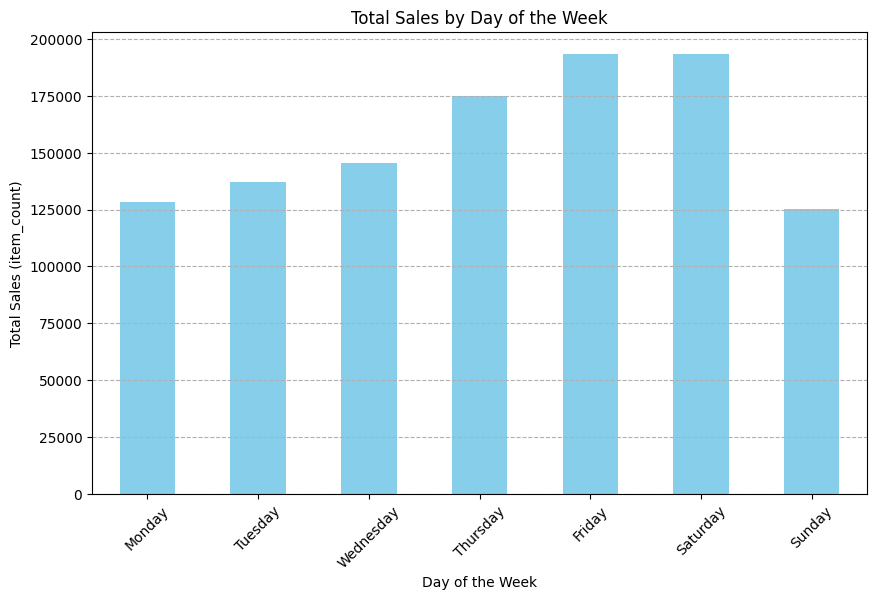

In [ ]:
# Analyze Sales by days of the week

# Extract the day of the week from the 'date' column (0 = Monday, 6 = Sunday)
final_df['day_of_week'] = final_df['date'].dt.dayofweek

# Map day of the week to names (optional for better readability)
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
final_df['day_name'] = final_df['day_of_week'].map(day_map)

# Aggregate total sales (item_count) by day of the week
sales_by_day = final_df.groupby('day_name')['item_count'].sum().reindex(day_map.values())

# Plot the sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (item_count)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Observations:

Peak Sales on Fridays and Saturdays:

Sales are highest on Friday and Saturday, with both days showing almost equal and maximum sales volumes. This suggests that these days could be the busiest, likely due to weekend-related shopping habits or promotional events.

Lower Sales on Mondays and Sundays:

Monday and Sunday see the lowest sales compared to the rest of the week. This may indicate that people tend to shop less at the beginning and end of the week, possibly due to post-weekend recovery (Monday) and a wind-down towards the end of the weekend (Sunday).

Mid-week Sales:

Sales from Tuesday to Thursday are relatively stable and moderate, with Wednesday and Thursday slightly outperforming Tuesday.

Potential Insights:

Weekend Focused Promotions: Given the high sales on Fridays and Saturdays, running targeted promotions or campaigns during these days might further boost sales.

Monday and Sunday: These days have lower sales, and it may be worth investigating if additional offers, events, or strategies could help stimulate sales during these slower periods.


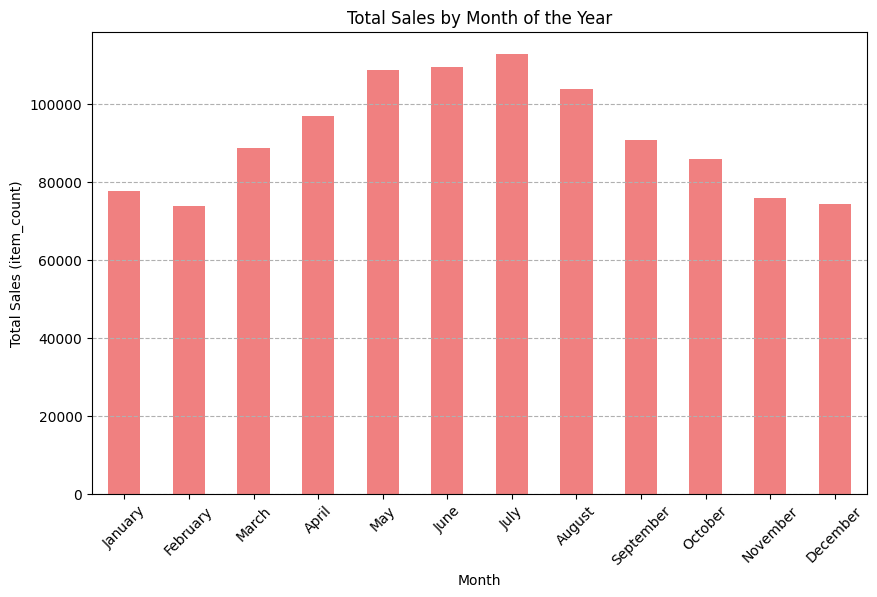

In [ ]:
# Analyze sales by month

# Extract the month from the 'date' column
final_df['month'] = final_df['date'].dt.month

# Map month numbers to month names (optional for better readability)
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
final_df['month_name'] = final_df['month'].map(month_map)

# Aggregate total sales (item_count) by month
sales_by_month = final_df.groupby('month_name')['item_count'].sum().reindex(month_map.values())

# Plot the sales by month
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Total Sales (item_count)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Observations:

Sales Peak in May and July: Sales reach their highest points in May and July, indicating these months have the highest demand. There might be specific events, holidays, or seasonal factors driving higher sales during these months.

Low Sales in December and Early Months: Sales drop significantly in December, November, and the beginning of the year (January and February). This may suggest that after the peak sales months, there’s a dip in consumer activity, possibly due to post-holiday slowdowns or colder seasons.

Sustained Activity from March to August: The months from March to August show relatively strong and steady sales activity, indicating that this period could be a busier time of the year overall.

End of Year Decline: After August, sales gradually decline towards the end of the year, especially in September, October, and further down in December.

Insights:

May and July could be prime months for promotional events or marketing efforts to further capitalize on higher demand.

December and early months may require strategies to boost sales during these typically slower periods, perhaps with post-holiday promotions or winter sales events.


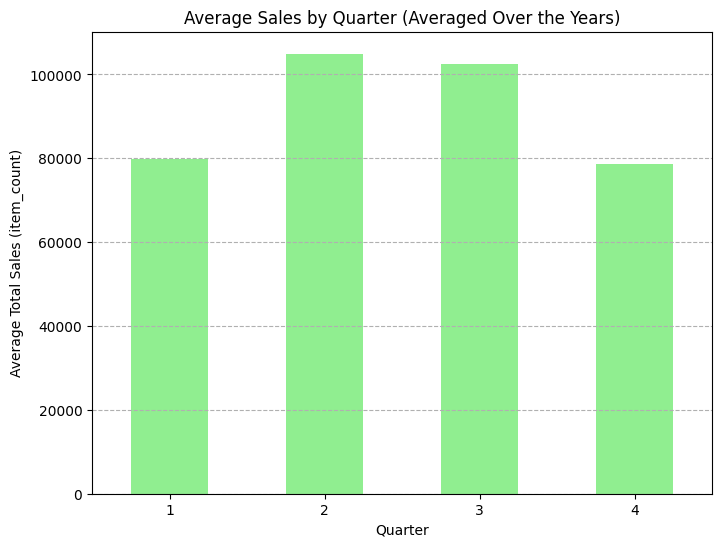

In [ ]:
# Analyze Sales by Quarters

# Extract the year and quarter from the 'date' column
final_df['year'] = final_df['date'].dt.year
final_df['quarter'] = final_df['date'].dt.quarter

# Aggregate total sales (item_count) by quarter and year
quarterly_sales = final_df.groupby(['year', 'quarter'])['item_count'].sum()

# Calculate the average sales for each quarter across years
avg_sales_by_quarter = quarterly_sales.groupby('quarter').mean()

# Plot the average sales by quarter
plt.figure(figsize=(8, 6))
avg_sales_by_quarter.plot(kind='bar', color='lightgreen')
plt.title('Average Sales by Quarter (Averaged Over the Years)')
plt.xlabel('Quarter')
plt.ylabel('Average Total Sales (item_count)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


Observations:

Highest Sales in Q2 and Q3:
Quarter 2 (April to June) and Quarter 3 (July to September) consistently have the highest average sales, with both quarters showing sales above 100,000 item count. This suggests that mid-year is the busiest period for sales.

Lower Sales in Q1 and Q4:
Quarter 1 (January to March) and Quarter 4 (October to December) have relatively lower sales, with Quarter 4 being the lowest. This could indicate slower sales at the start and end of the year.

Potential Insights:

Seasonal Trends: The higher sales in Q2 and Q3 may indicate seasonal factors driving sales, such as holidays, vacations, or seasonal promotions during these months.

Focus on Q1 and Q4: Since sales are lower in Q1 and Q4, it may be worth investigating strategies to boost sales during these times (e.g., new promotions, discounts, or marketing campaigns).


In [ ]:
# Performance Comparison for stores and restaurants

# Find Restaurant with most sales

# Aggregate total sales (item_count) by restaurant
sales_by_restaurant = final_df.groupby('store_name')['item_count'].sum()

# Identify the restaurant with the most sales
top_restaurant = sales_by_restaurant.idxmax()
top_sales = sales_by_restaurant.max()

# Display the top restaurant and its total sales
print(f"The restaurant with the most sales is {top_restaurant} with a total of {top_sales} items sold.")

The restaurant with the most sales is Bob's Diner with a total of 892905.5 items sold.


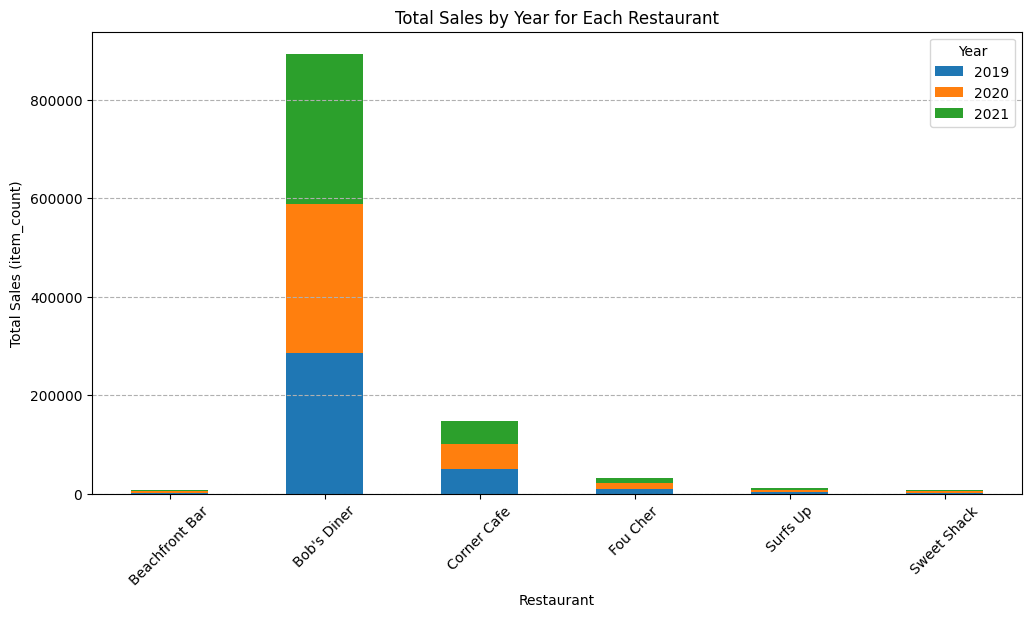

In [ ]:
# Analyze Sales for Each Restaurant Across Years, Months, and Days

# Sales by Year

# Extract the year from the date column
final_df['year'] = final_df['date'].dt.year

# Aggregate sales by year for each restaurant
sales_by_year = final_df.groupby(['store_name', 'year'])['item_count'].sum().unstack()

# Plot the sales by year for each restaurant
sales_by_year.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Total Sales by Year for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales (item_count)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--')
plt.show()

Observations:

Bob’s Diner:

Bob's Diner is by far the highest-performing restaurant, with significantly higher sales than all the others. It has consistent sales growth over the years, with 2021 being the strongest year.
This suggests Bob's Diner is a standout performer across all years, driving the majority of sales.

Corner Cafe:

Corner Cafe is the second-highest performing restaurant, but it is still much smaller in scale compared to Bob's Diner.
The sales for Corner Cafe have been steady across the years, with slight growth from 2019 to 2021.

Other Restaurants:

Beachfront Bar, Fou Cher, Surfs Up, and Sweet Shack have much smaller sales in comparison to Bob’s Diner and Corner Cafe.
These restaurants show relatively steady but low sales across the three years.

Insights:

Bob’s Diner Dominates: It is clear that Bob’s Diner is the key driver of sales across all restaurants. Its consistent sales growth over the years suggests it might have a larger customer base or more effective sales strategies.

Opportunities for Other Restaurants: For restaurants like Fou Cher, Surfs Up, and Sweet Shack, there could be potential growth opportunities. Strategies to improve their sales could involve targeted marketing, special promotions, or leveraging the success of Bob's Diner.

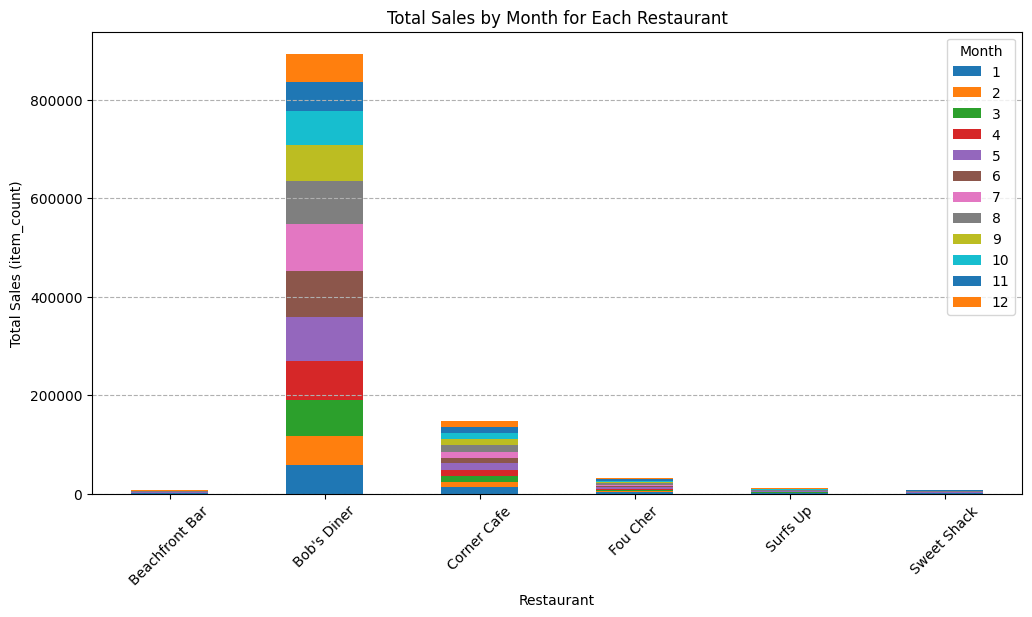

In [ ]:
# Sales by Month

# Aggregate total sales (item_count) by month for each restaurant
sales_by_month = final_df.groupby(['store_name', 'month'])['item_count'].sum().unstack()

# Plot the sales by month for each restaurant
sales_by_month.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Total Sales by Month for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales (item_count)')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--')
plt.show()

Observations:

Bob’s Diner:

Bob's Diner shows a fairly consistent distribution of sales across all months. This suggests that Bob’s Diner maintains a steady flow of sales throughout the year without any significant seasonal dips or peaks.
The sales are spread relatively evenly across all months, meaning Bob's Diner likely doesn’t depend heavily on specific months or seasonal sales spikes.

Corner Cafe:

Corner Cafe also shows steady monthly sales, but on a much smaller scale compared to Bob’s Diner. There doesn’t appear to be a single standout month where sales dramatically increase or decrease.
The cafe seems to have a consistent customer base throughout the year.

Other Restaurants:

Beachfront Bar, Fou Cher, Surfs Up, and Sweet Shack show much smaller monthly sales, with very little variation month-to-month. These restaurants likely have more sporadic or low-volume sales, with no clear seasonal trends.

Insights:

Steady Performance for Bob's Diner and Corner Cafe: Both restaurants have steady sales across all months. Bob's Diner, in particular, performs well regardless of the time of year, which could indicate consistent demand, strong branding, or a large customer base.

Lower Performing Restaurants: Restaurants like Fou Cher, Surfs Up, and Sweet Shack could potentially benefit from seasonal promotions or targeted marketing to increase sales, as their performance is consistently low across all months.

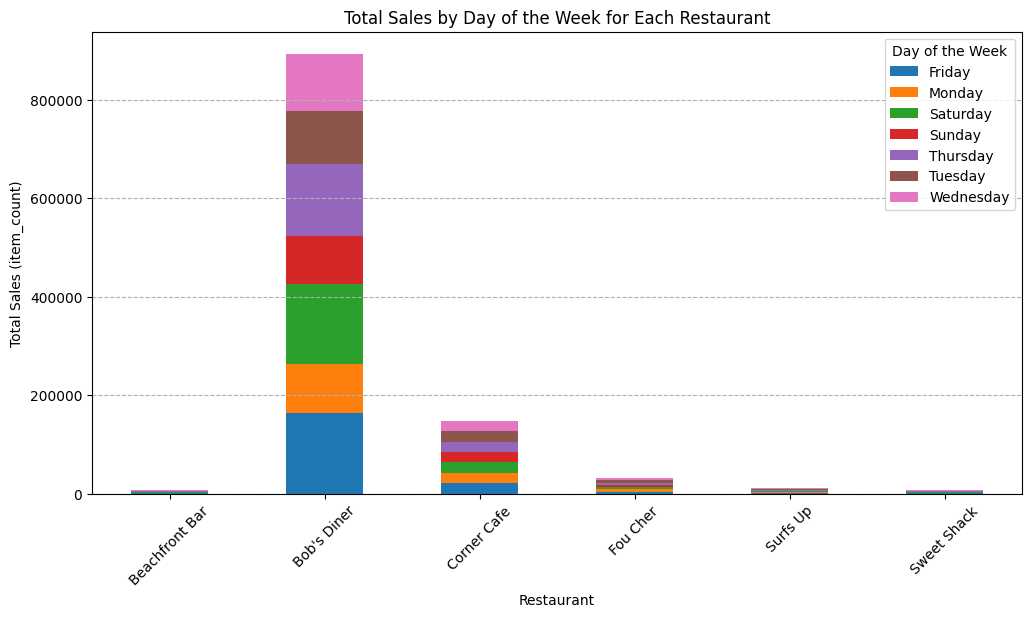

In [ ]:
# Sales by Days

# Extract the day of the week from the date column
final_df['day_of_week'] = final_df['date'].dt.dayofweek
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
final_df['day_name'] = final_df['day_of_week'].map(day_map)

# Aggregate total sales (item_count) by day of the week for each restaurant
sales_by_day = final_df.groupby(['store_name', 'day_name'])['item_count'].sum().unstack()

# Plot the sales by day of the week for each restaurant
sales_by_day.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Total Sales by Day of the Week for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales (item_count)')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.grid(axis='y', linestyle='--')
plt.show()

Bob’s Diner:

Bob’s Diner dominates sales on all days of the week, but sales are relatively evenly distributed across the week. This indicates that Bob’s Diner doesn’t rely heavily on weekends or weekdays—it performs consistently on all days.
The highest sales occur on Wednesday and Tuesday, but the difference between the days is minimal.

Corner Cafe:

Corner Cafe shows more variation across the week. Although the sales are spread across the days, Friday, Saturday, and Sunday seem to have slightly higher sales compared to weekdays.
This pattern could suggest that Corner Cafe benefits from weekend traffic, perhaps driven by leisure diners or weekend promotions.

Other Restaurants:

Fou Cher, Surfs Up, and Sweet Shack show relatively low sales, but the sales seem to be spread evenly across the days.
These restaurants don’t appear to experience a strong weekly trend, indicating a more stable but low volume of sales.

Insights:

Bob's Diner's Consistency: Bob’s Diner is successful throughout the week, showing no major dips or spikes in sales, which suggests a broad customer base and consistent demand.

Corner Cafe's Weekend Sales: Corner Cafe has slightly higher sales on the weekends, suggesting it may benefit from weekend foot traffic or be a popular spot for leisure dining.

Opportunities for Low-Performing Restaurants: Restaurants like Fou Cher, Surfs Up, and Sweet Shack might consider targeted promotions on specific days of the week, especially weekends, to drive more sales.

In [ ]:
# Items Analysis

# Most Popular Items

# Aggregate total sales (item_count) by item across all stores
most_popular_items = final_df.groupby('item_name')['item_count'].sum().sort_values(ascending=False)

# Display the top 10 most popular items
print("Most Popular Items Overall:")
print(most_popular_items.head(10))

Most Popular Items Overall:
item_name
Frozen Milky Smoothy               304758.0
Strawberry Smoothy                 236337.0
Mutton Dinner                      111251.0
Orange Juice                        87087.0
Amazing pork lunch                  61043.0
Blue Ribbon Beef Entree             42774.0
Amazing Steak Dinner with Rolls     34439.0
Sweet Frozen Soft Drink             27510.0
Sea Bass with Vegetables Dinner     23839.0
Sweet Lamb Cake                     18860.0
Name: item_count, dtype: float64


In [ ]:
# Stores Where the Most Popular Items are Being Sold

# Merge the most popular items with their respective stores
popular_items_stores = final_df[final_df['item_name'].isin(most_popular_items.head(10).index)]

# Group by item_name and store_name to see where popular items are being sold
items_in_stores = popular_items_stores.groupby(['item_name', 'store_name'])['item_count'].sum().unstack()

# Display the stores where the top 10 most popular items are being sold
print("Stores Selling the Most Popular Items:")
print(items_in_stores)


Stores Selling the Most Popular Items:
store_name                       Bob's Diner  Corner Cafe
item_name                                                
Amazing Steak Dinner with Rolls      34439.0          NaN
Amazing pork lunch                   61043.0          NaN
Blue Ribbon Beef Entree              42774.0          NaN
Frozen Milky Smoothy                183787.5     120970.5
Mutton Dinner                       111251.0          NaN
Orange Juice                         87087.0          NaN
Sea Bass with Vegetables Dinner      23839.0          NaN
Strawberry Smoothy                  236337.0          NaN
Sweet Frozen Soft Drink              27510.0          NaN
Sweet Lamb Cake                      18860.0          NaN


In [ ]:
# Most Popular Item at Each Store

# Group by store_name and item_name to find the most popular item at each store
most_popular_item_by_store = final_df.groupby(['store_name', 'item_name'])['item_count'].sum().reset_index()

# Sort by store_name and item_count, and find the most popular item for each store
most_popular_item_by_store = most_popular_item_by_store.sort_values(['store_name', 'item_count'], ascending=[True, False]).drop_duplicates('store_name')

# Display the most popular item for each store
print("Most Popular Item at Each Store:")
print(most_popular_item_by_store[['store_name', 'item_name', 'item_count']])


Most Popular Item at Each Store:
        store_name                item_name  item_count
1   Beachfront Bar  Fantastic Milky Smoothy      1487.0
25     Bob's Diner       Strawberry Smoothy    236337.0
39     Corner Cafe     Frozen Milky Smoothy    120970.5
72        Fou Cher               Milky Cake      4372.0
81        Surfs Up       Awesome Soft Drink      1416.0
88     Sweet Shack          Awesome Smoothy      2120.0


In [ ]:
# Store Revenue Analysis

# Aggregate total sales volume (item_count) by store
sales_volume_by_store = final_df.groupby('store_name')['item_count'].sum().sort_values(ascending=False)

# Identify the store with the highest sales volume
top_store_by_volume = sales_volume_by_store.idxmax()

# Display the store with the highest sales volume
print(f"The store with the highest sales volume is {top_store_by_volume}.")


The store with the highest sales volume is Bob's Diner.


In [ ]:
# Calculate daily revenue by multiplying item_count and price
final_df['daily_revenue'] = final_df['item_count'] * final_df['price']

# Aggregate total daily revenue by store and date
daily_revenue_by_store = final_df.groupby(['store_name', 'date'])['daily_revenue'].sum().reset_index()

# Calculate the average daily revenue for each store
average_daily_revenue_by_store = daily_revenue_by_store.groupby('store_name')['daily_revenue'].mean().sort_values(ascending=False)

# Display the top store by average daily revenue
top_store_by_revenue = average_daily_revenue_by_store.idxmax()

print(f"The store with the highest average daily revenue is {top_store_by_revenue}.")


The store with the highest average daily revenue is Bob's Diner.


In [ ]:
# Compare if the store with the highest sales volume is also the store with the highest daily revenue
if top_store_by_volume == top_store_by_revenue:
    print(f"The store with the highest sales volume ({top_store_by_volume}) is also making the most money per day.")
else:
    print(f"The store with the highest sales volume ({top_store_by_volume}) is NOT making the most money per day. The store with the highest daily revenue is {top_store_by_revenue}.")

The store with the highest sales volume (Bob's Diner) is also making the most money per day.


In [ ]:
# Most Expensive Item at Each Restaurant

# Group by store_name and item_name to find the most expensive item at each store
most_expensive_item_by_store = final_df.groupby(['store_name', 'item_name']).agg({'price': 'max'}).reset_index()

# Sort by store_name and price to get the most expensive item for each store
most_expensive_item_by_store = most_expensive_item_by_store.sort_values(['store_name', 'price'], ascending=[True, False]).drop_duplicates('store_name')

# Display the most expensive item at each store
print("Most Expensive Item at Each Restaurant:")
print(most_expensive_item_by_store[['store_name', 'item_name', 'price']])


Most Expensive Item at Each Restaurant:
        store_name                      item_name  price
5   Beachfront Bar          Sweet Vegi Soft Drink   5.70
28     Bob's Diner              Sweet Fruity Cake  29.22
50     Corner Cafe                     Pike Lunch  26.37
55        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98
87        Surfs Up                     Steak Meal  26.21
89     Sweet Shack         Blue Ribbon Milky Cake   6.89


In [ ]:
# Calorie Count for the Most Expensive Items

# Merge the most expensive items with the calorie information
most_expensive_items_with_kcal = pd.merge(most_expensive_item_by_store, final_df[['store_name', 'item_name', 'kcal']], on=['store_name', 'item_name'], how='left')

# Remove duplicates to show only unique entries for the most expensive item at each restaurant
most_expensive_items_unique = most_expensive_items_with_kcal[['store_name', 'item_name', 'price', 'kcal']].drop_duplicates()

# Display the unique most expensive item and its calorie count for each store
print("Most Expensive Item at Each Restaurant with Calorie Count (Unique):")
print(most_expensive_items_unique)


Most Expensive Item at Each Restaurant with Calorie Count (Unique):
          store_name                      item_name  price  kcal
0     Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
1096     Bob's Diner              Sweet Fruity Cake  29.22   931
2192     Corner Cafe                     Pike Lunch  26.37   653
3288        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
4384        Surfs Up                     Steak Meal  26.21   607
5480     Sweet Shack         Blue Ribbon Milky Cake   6.89   612


In [ ]:
# Feature Engineering

# Create additional time-based features
final_df['year'] = final_df['date'].dt.year
final_df['month'] = final_df['date'].dt.month
final_df['day_of_week'] = final_df['date'].dt.dayofweek
final_df['day_of_month'] = final_df['date'].dt.day
final_df['quarter'] = final_df['date'].dt.quarter

# Target variable: let's assume we are predicting 'item_count' (total sales)
target = 'item_count'

# Features for the model
features = ['year', 'month', 'day_of_week', 'day_of_month', 'quarter']

In [ ]:
# Split Data

# Sort the data by date
final_df = final_df.sort_values(by='date')

# Define the cutoff for the last 6 months
cutoff_date = final_df['date'].max() - pd.DateOffset(months=6)

# Split the data into training and testing sets
train_df = final_df[final_df['date'] <= cutoff_date]
test_df = final_df[final_df['date'] > cutoff_date]

# Define X and y for both train and test sets
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [ ]:
# Build and Train Models

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

In [ ]:
# Compare Models

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")

Linear Regression RMSE: 36.273547884685634
Random Forest RMSE: 36.18025485363126
XGBoost RMSE: 36.18069455616483


Interpretation:
The Random Forest and XGBoost models are performing almost equally well in terms of error reduction, with very minimal difference between them.
Linear Regression, while slightly behind, still provides a reasonable RMSE.


In [ ]:
# Hyperparameter Tuning Using GridSearchCV

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator (model with the best hyperparameters)
best_xgb_model = grid_search.best_estimator_

# Predict using the best model on the test data
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate the RMSE for the tuned XGBoost model
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f"Tuned XGBoost RMSE: {rmse_best_xgb}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost RMSE: 36.17423814745167


          date  predicted_sales
0   2021-12-31        10.932021
1   2022-01-01        10.643672
2   2022-01-02         6.520199
3   2022-01-03         6.914582
4   2022-01-04         7.330668
..         ...              ...
360 2022-12-26         6.838395
361 2022-12-27         6.613061
362 2022-12-28         7.507420
363 2022-12-29         9.757533
364 2022-12-30        10.639988

[365 rows x 2 columns]


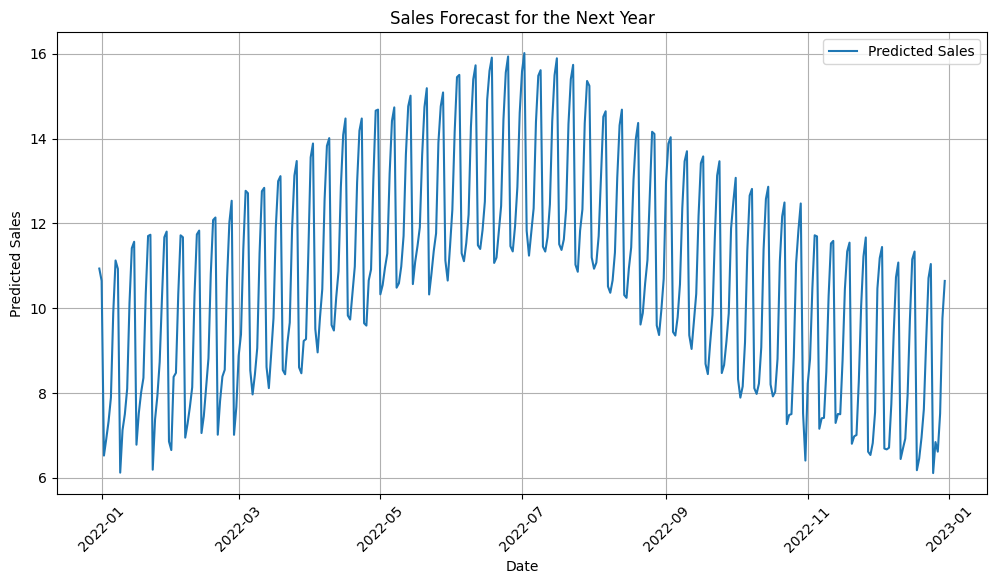

In [ ]:
# Forecasting the Sales for Next Year with Tuned XGBoost

# Create future dates for the next year (365 days from the latest date in your data)
future_dates = pd.date_range(start=final_df['date'].max(), periods=365, freq='D')

# Generate the same features for the future dates as we did for training
future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['day_of_month'] = future_df['date'].dt.day
future_df['quarter'] = future_df['date'].dt.quarter

# Use the same features as before for prediction
X_future = future_df[features]

# Predict the sales for the future dates using the tuned XGBoost model
future_predictions = best_xgb_model.predict(X_future)

# Add the predicted sales to the future dataframe
future_df['predicted_sales'] = future_predictions

# Display the forecast for the next year
print(future_df[['date', 'predicted_sales']])


# Plot the Forecast
plt.figure(figsize=(12, 6))
plt.plot(future_df['date'], future_df['predicted_sales'], label='Predicted Sales')
plt.title('Sales Forecast for the Next Year')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()




In [ ]:
## DEEP LEARNING

from sklearn.preprocessing import MinMaxScaler

# Data Preparation and Feature Engineering

# Sort the dataset by date and set the 'date' column as the index
final_df = final_df.sort_values('date').set_index('date')

# Use 'sales_amount' (instead of item_count) as the target for LSTM predictions
# Ensure 'sales_amount' column exists; you can create it if it’s missing
final_df['sales_amount'] = final_df['item_count'] * final_df['price']

# Feature scaling (Min-Max scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(final_df[['sales_amount']])

# Prepare the data as a supervised learning problem
def create_supervised_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Use a sliding window of 90 days (you can adjust the window size)
time_steps = 90
X, y = create_supervised_data(scaled_sales, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

In [ ]:
# Define the Train and Test Series

# Define the train and test split (use the last 12 months as test set)
train_size = int(len(X) * 0.80)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build and Train the LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0101 - val_loss: 0.0126
Epoch 2/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0103 - val_loss: 0.0119
Epoch 3/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0096 - val_loss: 0.0119
Epoch 4/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0094 - val_loss: 0.0114
Epoch 5/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0089 - val_loss: 0.0116
Epoch 6/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0088 - val_loss: 0.0106
Epoch 7/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0083 - val_loss: 0.0112
Epoch 8/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0085 - val_loss: 0.0109
Epoch 9/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 10/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0081 - val_loss: 0.0099
Epoch 11/100
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0081 - val_loss: 0.01

644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
MAPE: 848.37%


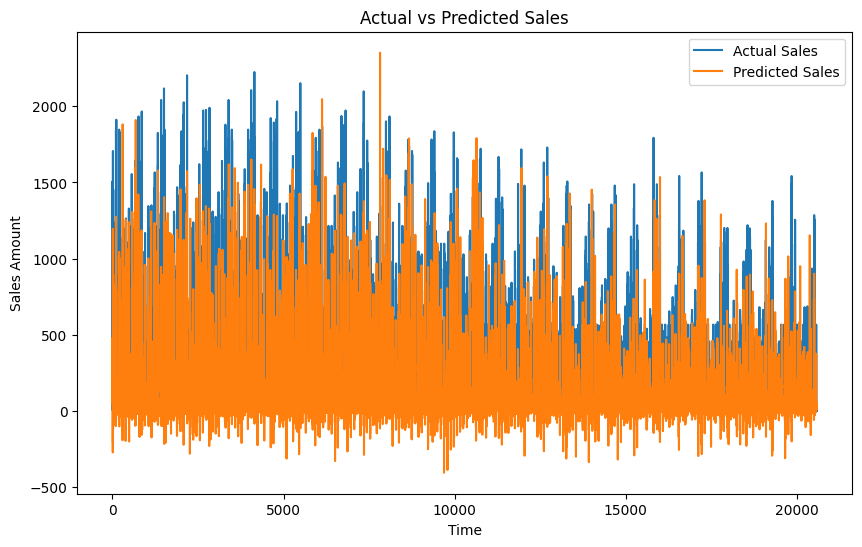

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Predict on test data
y_pred = model.predict(X_test)

# Inverse scale the predicted and true values to get actual sales amounts
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate the MAPE
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print(f'MAPE: {mape * 100:.2f}%')

# Plot the predicted vs actual sales
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

Observations :

The high MAPE suggests that the current model setup needs improvement.
We can improve the model by adding more features, adjusting the time window, tuning the LSTM architecture, and experimenting with different scaling techniques.

Prediction Consistency:

The predicted sales follow a similar trend to the actual sales, but the predicted values seem to be smoothed or less volatile compared to the actual sales. This is common in LSTM models because they tend to smooth out the noise in sequential data.

Prediction Errors:

There are areas where the predicted sales are much lower than the actual sales, and in some cases, the model predicted negative sales amounts (which is not ideal).
The model might not be capturing some high spikes or sudden drops in sales effectively, which could be due to limitations in feature representation or insufficient data to capture such variability.


Epoch 1/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - loss: 0.0056
Epoch 2/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - loss: 0.0048
Epoch 3/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - loss: 0.0045
Epoch 4/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 0.0044
Epoch 5/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.0041
Epoch 6/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0039
Epoch 7/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0038
Epoch 8/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0037
Epoch 9/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 0.0035
Epoch 10/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0036
Epoch 11/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - loss: 0.0035
Epoch 12/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 0.0034
Epoch 13/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 0.0034
Epoch 14/50
3217/3217 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.0034
Epoch 1

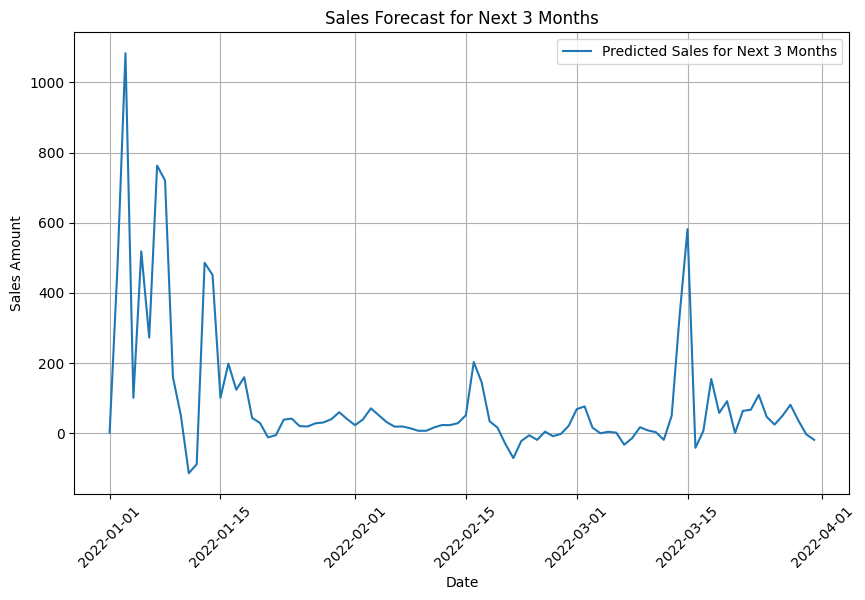

In [ ]:
# Retrain the model using the entire dataset (X, y)
model.fit(X, y, epochs=50, batch_size=32)

# Create future dates for the next 3 months (90 days)
future_steps = 90
last_30_days = scaled_sales[-time_steps:]  # Use the last 30 days as input for the forecast

# Generate predictions for the next 90 days
future_predictions = []
for _ in range(future_steps):
    next_pred = model.predict(last_30_days.reshape(1, time_steps, 1))
    future_predictions.append(next_pred[0, 0])
    last_30_days = np.append(last_30_days[1:], next_pred).reshape(-1, 1)

# Inverse scale the predictions to get actual sales values
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a dataframe with future dates and predicted sales
future_dates = pd.date_range(start=final_df.index[-1] + pd.Timedelta(days=1), periods=future_steps)
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_sales': future_predictions_inv.flatten()})

# Display the forecast
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='Predicted Sales for Next 3 Months')
plt.title('Sales Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()